In [3]:
import nltk
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer
st = LancasterStemmer()
 
# Create Snowball stemmer
snow_stemmer = SnowballStemmer(language='english')

# Create a Porter Stemmer instance
porter_stemmer = PorterStemmer()

# Create a Lancaster Stemmer instance
lancaster_stemmer = LancasterStemmer()

# Example words for stemming
words = ["running", "jumps", "happily", "programming", 'cared','fairly','sportingly']

# Apply stemming to each word
stemmed_words = [porter_stemmer.stem(word) for word in words]
print("===Porter===:")
print("Original words:", words)
print("Stemmed words:", stemmed_words)

print("\n===Snowball===:")
stemmed_words = [snow_stemmer.stem(word) for word in words]
print("Porter:")
print("Original words:", words)
print("Stemmed words:", stemmed_words)

print("\n===Lancaster===:")
stemmed_words = [lancaster_stemmer.stem(word) for word in words]
print("Porter:")
print("Original words:", words)
print("Stemmed words:", stemmed_words)

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
===Porter===:
Original words: ['running', 'jumps', 'happily', 'programming', 'cared', 'fairly', 'sportingly']
Stemmed words: ['run', 'jump', 'happili', 'program', 'care', 'fairli', 'sportingli']

===Snowball===:
Porter:
Original words: ['running', 'jumps', 'happily', 'programming', 'cared', 'fairly', 'sportingly']
Stemmed words: ['run', 'jump', 'happili', 'program', 'care', 'fair', 'sport']

===Lancaster===:
Porter:
Original words: ['running', 'jumps', 'happily', 'programming', 'cared', 'fairly', 'sportingly']
Stemmed words: ['run', 'jump', 'happy', 'program', 'car', 'fair', 'sport']


# Exercises

#### Task 0. Compare frequency distributions of stemmed and unstemmed NLTK corpora. Display most commonly used stems from nltk.text corpora on a plot.
###### Завдання 0. Порівняйте частотні розподіли stemmed and unstemmed корпусів NLTK. Відображення найбільш часто використовуваних джерел із корпусів nltk.text на сюжеті.

[nltk_data] Downloading package brown to
[nltk_data]     /Users/boykosvitlana/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


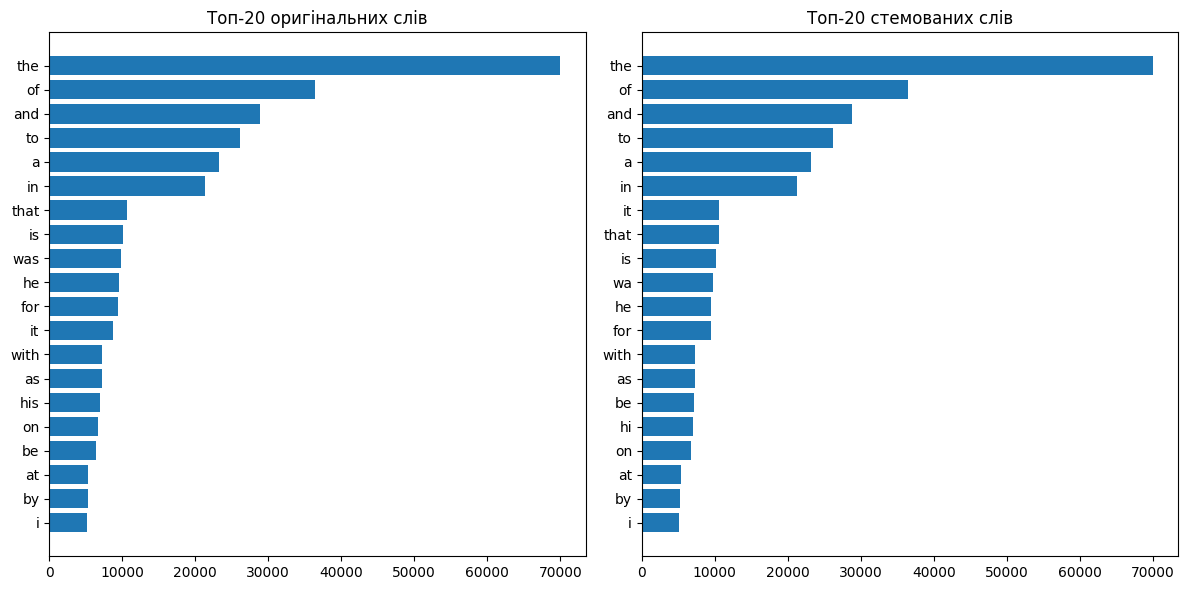

In [4]:
import nltk
from nltk.corpus import brown
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from collections import Counter

# Завантажуємо корпус Brown i отримуємо список усіх слів із нього
nltk.download('brown')
words = brown.words()

# Обробка слів
porter = PorterStemmer() # Створюємо об'єкт для стемінгу
original_words = [word.lower() for word in words if word.isalpha()]  # переводимо слова у нижній регістр, залишаємо тільки ті, що складаються з літер
stemmed_words = [porter.stem(word) for word in original_words]       # Застосовуємо стемінг до кожного слова

# Підрахунок частоти слів
original_freq = Counter(original_words)
stemmed_freq = Counter(stemmed_words)

# Візуалізація результатів 
plt.figure(figsize=(12, 6))

# Топ-20 оригінальних слів
plt.subplot(1, 2, 1)
common_original = original_freq.most_common(20)
plt.barh([w[0] for w in common_original], [w[1] for w in common_original])
plt.title('Топ-20 оригінальних слів')
plt.gca().invert_yaxis()

# Топ-20 стемованих слів
plt.subplot(1, 2, 2)
common_stemmed = stemmed_freq.most_common(20)
plt.barh([w[0] for w in common_stemmed], [w[1] for w in common_stemmed])
plt.title('Топ-20 стемованих слів')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

#### Task 1. Write your own version of stemmer for Ukrainian (or other non-English language) using regular expressions.
#### There is a regexp stemmer in NLTK (link).
#### Please write your code so that it satisfies NLTK’s standard interface (a Stemmer class with .stem() method)

###### Завдання 1. Напишіть власну версію stemmer для української (або іншої неанглійської) мови, використовуючи регулярні вирази.
###### У NLTK є стеммер регулярного виразу (посилання).
###### Напишіть свій код так, щоб він відповідав стандартному інтерфейсу NLTK (клас Stemmer із методом .stem())

In [5]:
import re
from nltk.stem.api import StemmerI

class UkrainianStemmer(StemmerI):
    def __init__(self):
        # ініціалізуємо регулярні вирази для видалення закінчень
        self.patterns = [
            # Іменники
            (re.compile(r'(ів|ев|ов|ам|ям|ах|ях|ами|ями|ах|ях|и|і|ею|єю|ою|а|я|у|ю|ем|єм|ом|ій|ий|ей|і|ю)$'), ''),
            # Дієслова
            (re.compile(r'(ти|тиме|тимуть|тимеш|тимем|тимемо|тите|тимете|ла|ли|ло|л|в|вши|ши|ать|ять|уть|ють|іть|їть|еть)$'), ''),
            # Прикметники
            (re.compile(r'(іший|іша|іше|іші|ішого|ішому|ішим|ішім|ішій|ішою|ішій|іші|іших|ішими|ий|а|е|і|ій|ого|ому|им|ім|ій|ою|ій|і|их|ими)$'), ''),
            # Прислівники
            (re.compile(r'(о|е|іше|ії|ій|ше)$'), ''),
        ]
        
        # # Словник винятків (слова, які не підпадають під загальні правила)
        self.exceptions = {
            'птаха': 'птах',
            'добра': 'добр',
            'синього': 'син',
        }
        
    # функція стемінгу
    def stem(self, word):  
        word = word.lower()  # переводимо до нижнього регістру
        
        # перевіряємо винятки
        if word in self.exceptions:
            return self.exceptions[word]
        
        # Застосування регулярних виразів
        for pattern, replacement in self.patterns:
            if pattern.search(word):
                stemmed = pattern.sub(replacement, word)
                if len(stemmed) >= 2:  # основа повинна бути не менше 2 літер
                    return stemmed
        
        return word

# Приклад використання
stemmer = UkrainianStemmer()
words = ["ходити", "ходив", "ходила", "ходили", "синє", "синього", "добрий", "добра"]
for word in words:
    print(f"{word} -> {stemmer.stem(word)}")

ходити -> ходит
ходив -> ходи
ходила -> ходил
ходили -> ходил
синє -> синє
синього -> син
добрий -> добр
добра -> добр


#### Task 2. Implement Wagner-Fischer (or Vintsyuk) algorithm for string distance. (Link).
#### Modify the algorithm so that substitution operation cost depends on the key proximity on QWERTY keyboard. For inspiration, look at this (StackExchange question).
#### Or consider (this table) directly:
#### Implement another modification to the algorithm: include transposition operation, so that you compute a (Damerau-Levenshtein distance).

###### Завдання 2. Реалізувати алгоритм Вагнера-Фішера (або Вінцюка) для відстані струни. (Link).
###### алгоритм Вагнера-Фішера обчислює редактийну відстань між двома рядками s1 та s2.
###### 2.1 Змініть алгоритм так, щоб вартість операції заміни залежала від близькості клавіш на клавіатурі QWERTY. Щоб отримати натхнення, перегляньте це запитання StackExchange.

###### Або розглянемо цю таблицю безпосередньо:

###### 2.2 Застосуйте іншу модифікацію алгоритму: додайте операцію транспонування, щоб ви обчислили відстань Дамерау-Левенштейна.

In [6]:
def wagner_fischer(s1, s2, substitution_cost_func=None, transposition=False):
    len_s1 = len(s1)
    len_s2 = len(s2)
    
    # Ініціалізація матриці
    d = [[0] * (len_s2 + 1) for _ in range(len_s1 + 1)]

    # Заповнення початкових значень (пустий рядок -> префікс)
    for i in range(len_s1 + 1):
        d[i][0] = i
    for j in range(len_s2 + 1):
        d[0][j] = j
    
    # QWERTY клавіатура - координати для розрахунку відстані між клавішами
    qwerty = {
        'q': (0, 0), 'w': (0, 1), 'e': (0, 2), 'r': (0, 3), 't': (0, 4), 'y': (0, 5), 'u': (0, 6), 'i': (0, 7), 'o': (0, 8), 'p': (0, 9),
        'a': (1, 0), 's': (1, 1), 'd': (1, 2), 'f': (1, 3), 'g': (1, 4), 'h': (1, 5), 'j': (1, 6), 'k': (1, 7), 'l': (1, 8),
        'z': (2, 0), 'x': (2, 1), 'c': (2, 2), 'v': (2, 3), 'b': (2, 4), 'n': (2, 5), 'm': (2, 6)
    }
    
    # Функція вартості заміни за замовчуванням
    if substitution_cost_func is None:
        substitution_cost_func = lambda a, b: 0 if a == b else 1

    # Заповнюємо нашу матрицю
    for i in range(1, len_s1 + 1):
        for j in range(1, len_s2 + 1):
            if s1[i-1] == s2[j-1]:   # Якщо символи однакові - вартість заміни 0
                cost = 0
            else:
                # Розрахунок вартості заміни на основі відстані на клавіатурі
                char1 = s1[i-1].lower()
                char2 = s2[j-1].lower()
                
                if char1 in qwerty and char2 in qwerty:
                    x1, y1 = qwerty[char1]
                    x2, y2 = qwerty[char2]
                    distance = ((x2-x1)**2 + (y2-y1)**2)**0.5     # Евклідова відстань між клавішами
                    cost = min(1, distance / 3.0)                 # Нормалізація до діапазону [0, 1]
                else:
                    cost = 1      # Стандартна вартість, якщо символи не на клавіатурі

            # Обчислюємо мінімальну вартість операцій:
            d[i][j] = min(
                d[i-1][j] + 1,      # Видалення символу з s1
                d[i][j-1] + 1,      # Вставка символу в s1
                d[i-1][j-1] + cost  # Заміна символу
            )
            
            # Додаткова перевірка на транспозицію (перестановку сусідніх символів)
            if transposition and i > 1 and j > 1 and s1[i-1] == s2[j-2] and s1[i-2] == s2[j-1]:
                d[i][j] = min(d[i][j], d[i-2][j-2] + cost)
    
    return d[len_s1][len_s2]

# Приклади використання
print(wagner_fischer("kitten", "sitting"))  # Звичайна відстань Левенштейна 
print(wagner_fischer("kitten", "sitting", transposition=True))  # Відстань Дамерау-Левенштейна
print(wagner_fischer("hello", "heklo"))  # Враховує відстань на клавіатурі (k і l близькі)

3
3
0.3333333333333333
